In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler


In [126]:
df = pd.read_csv("StudentsPerformance.csv")

In [127]:
df_copy = df.copy()

In [128]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [130]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [131]:
df.shape

(1000, 8)

In [132]:
# Extensive EDA


In [133]:
df["gender"].value_counts(normalize=True)*100  # Fairly equal dist of males and females

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

In [134]:
df["race/ethnicity"].value_counts(normalize=True)*100 # Should we group A + B = 

race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

In [135]:
df["parental level of education"].value_counts(normalize=True)*100  # should we group bachelors degree and master degree

parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64

In [136]:
df["lunch"].value_counts(normalize=True)*100 

lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64

In [137]:
df["test preparation course"].value_counts(normalize=True)*100 

test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64

In [138]:
df["math score"].value_counts(normalize=True)*100 

math score
65    3.6
62    3.5
69    3.2
59    3.2
73    2.7
     ... 
24    0.1
26    0.1
19    0.1
23    0.1
8     0.1
Name: proportion, Length: 81, dtype: float64

<Axes: ylabel='Frequency'>

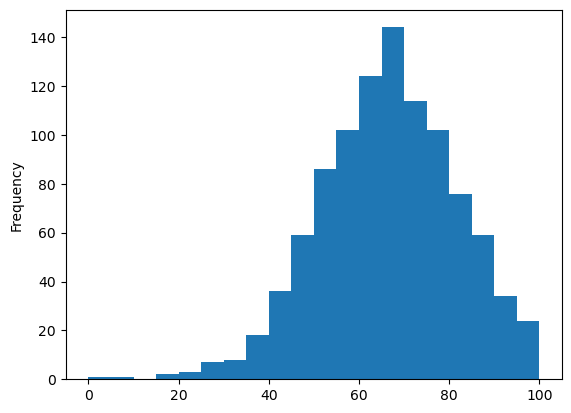

In [139]:
df["math score"].plot(kind="hist", bins=20)

<Axes: ylabel='Frequency'>

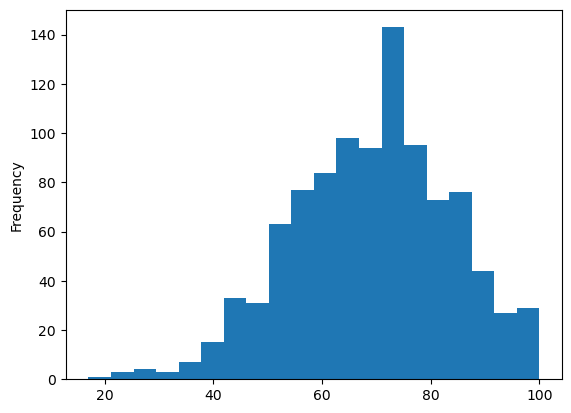

In [140]:
df["reading score"].plot(kind="hist", bins=20)

<Axes: ylabel='Frequency'>

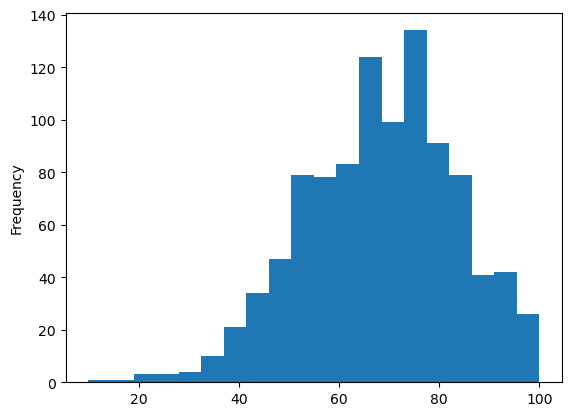

In [141]:
df["writing score"].plot(kind="hist", bins=20)

In [142]:
df.describe()  # scores for each subject are very similar

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<Axes: >

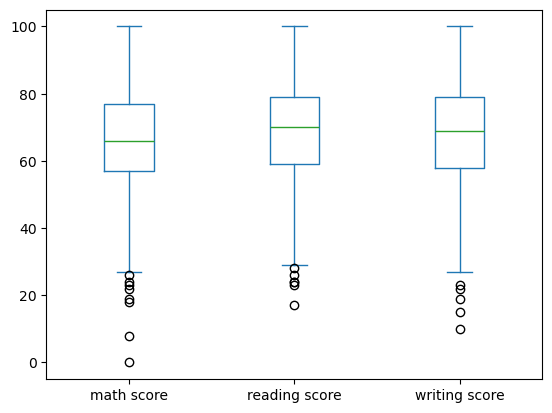

In [143]:
df[["math score", "reading score", "writing score"]].plot(kind="box") 

In [144]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [145]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [146]:
df["gender"] = df["gender"].replace({"female":0, "male":1})

In [147]:
df["gender"].unique()

array([0, 1])

In [148]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [149]:
df["race/ethnicity"] = df["race/ethnicity"].replace({"group A": 1, "group B":2, "group C": 3, "group D": 4, "group E": 5})

In [150]:
df["race/ethnicity"].unique()

array([2, 3, 1, 4, 5])

In [151]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [152]:
df["parental level of education"] = df["parental level of education"].replace({"bachelor's degree": 5,'some college': 3, "master's degree": 6,
       "associate's degree": 4, 'high school': 2, 'some high school':1})

In [153]:
df["parental level of education"].unique()


array([5, 3, 6, 4, 2, 1])

In [154]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [155]:
df["lunch"] = df["lunch"].replace({'standard': 0, 'free/reduced':1})

In [156]:
df["lunch"].unique()

array([0, 1])

In [157]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [158]:
df["test preparation course"] = df["test preparation course"]. replace({'none': 0, 'completed':1})

In [159]:
df.dtypes

gender                         int64
race/ethnicity                 int64
parental level of education    int64
lunch                          int64
test preparation course        int64
math score                     int64
reading score                  int64
writing score                  int64
dtype: object

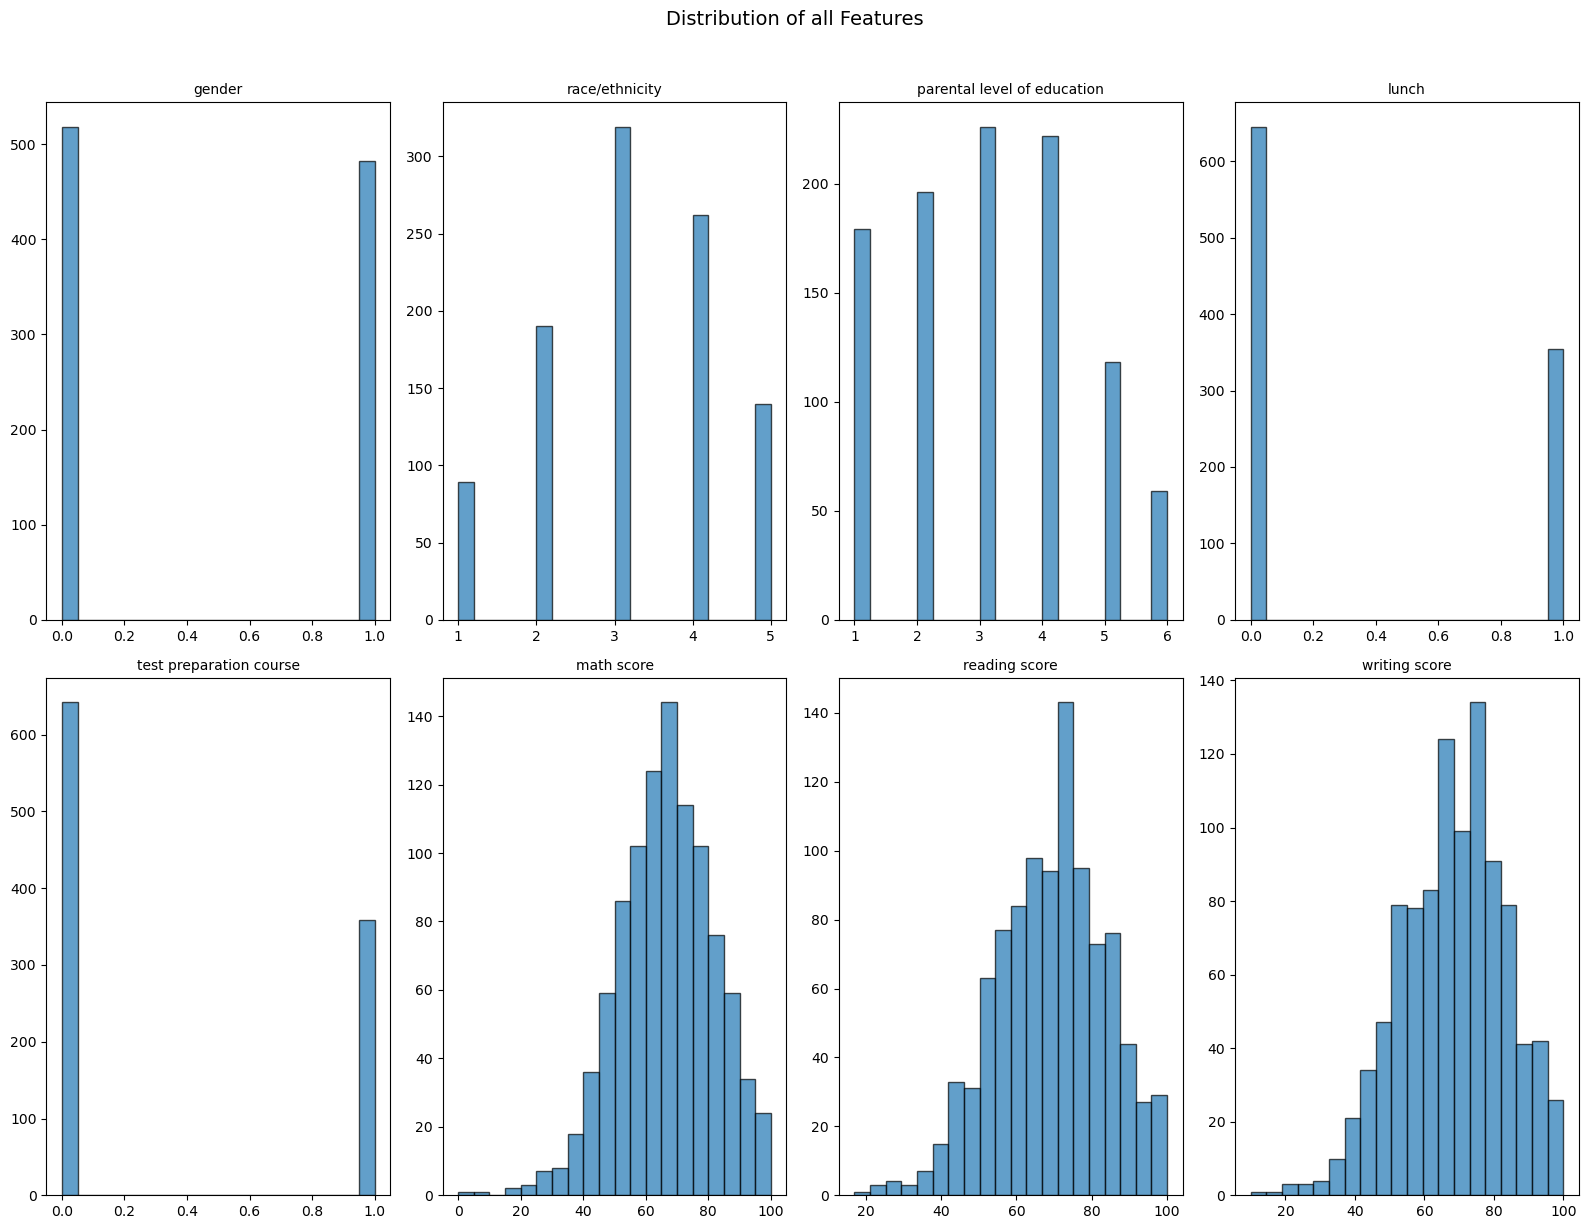

In [160]:
fig, axes = plt.subplots(2, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns[:8]):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of all Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

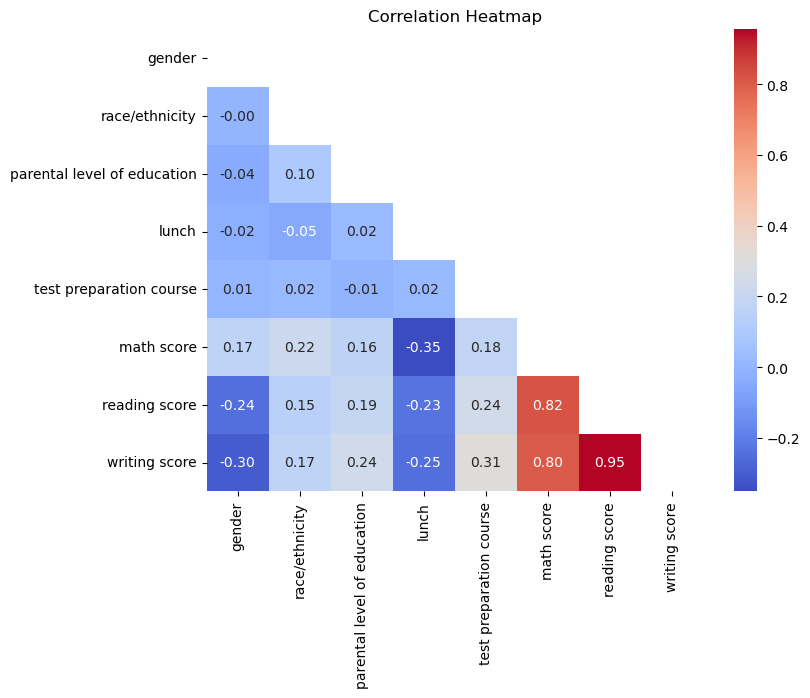

In [161]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [162]:
df.corr() # main ones are all scores highly correlated

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,0.167982,-0.244313,-0.301225
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.216415,0.145253,0.165691
parental level of education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.159432,0.190908,0.236715
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.350877,-0.229560,-0.245769
test preparation course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.177702,0.241780,0.312946
math score,0.167982,0.216415,0.159432,-0.350877,0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.145253,0.190908,-0.229560,0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.165691,0.236715,-0.245769,0.312946,0.802642,0.954598,1.000000


In [163]:
df[["race/ethnicity", "parental level of education", "math score", "reading score", "writing score"]].corr()

,race/ethnicity,parental level of education,math score,reading score,writing score
race/ethnicity,1.000000,0.095906,0.216415,0.145253,0.165691
parental level of education,0.095906,1.000000,0.159432,0.190908,0.236715
math score,0.216415,0.159432,1.000000,0.817580,0.802642
reading score,0.145253,0.190908,0.817580,1.000000,0.954598
writing score,0.165691,0.236715,0.802642,0.954598,1.000000


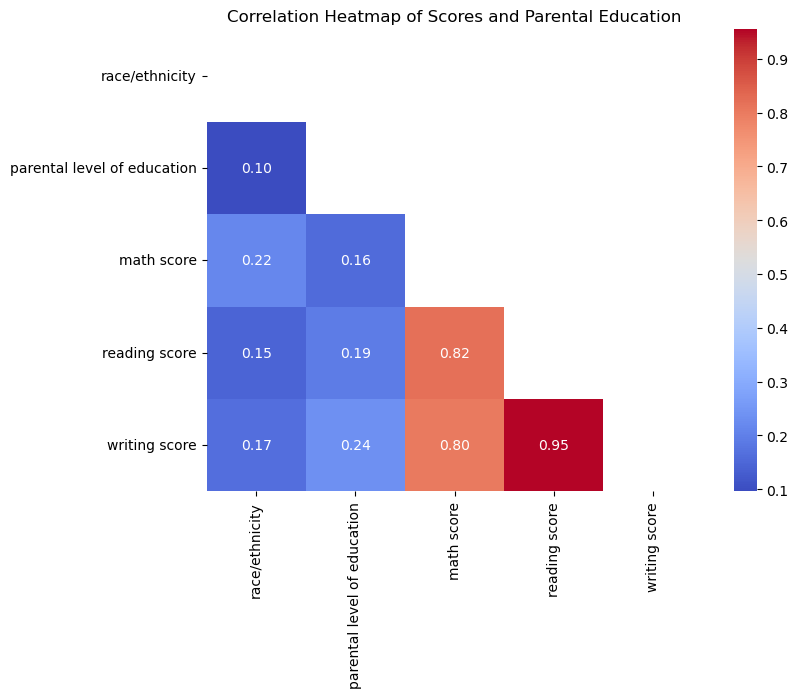

In [164]:
corr = df[["race/ethnicity", "parental level of education", "math score", "reading score", "writing score"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Scores and Parental Education")
plt.show()

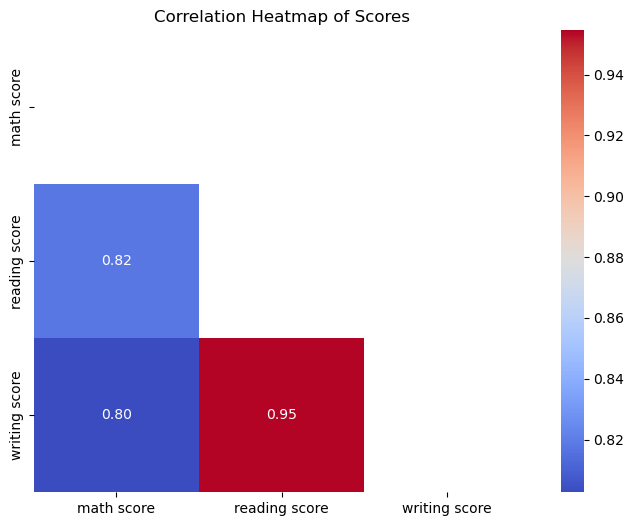

In [165]:
corr = df[["math score", "reading score", "writing score"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Scores")
plt.show()

In [166]:
df_scores = df[["math score", "reading score", "writing score"]]
df_scores.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [167]:
columns_list = df.columns.tolist()
print(columns_list)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [168]:
df_math_score_comparison = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score']]
df_math_score_comparison.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
0,0,2,5,0,0,72
1,0,3,3,0,1,69
2,0,2,6,0,0,90
3,1,1,4,1,0,47
4,1,3,3,0,0,76


In [169]:
df_math_score_comparison.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,0.167982
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.216415
parental level of education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.159432
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.350877
test preparation course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.177702
math score,0.167982,0.216415,0.159432,-0.350877,0.177702,1.000000


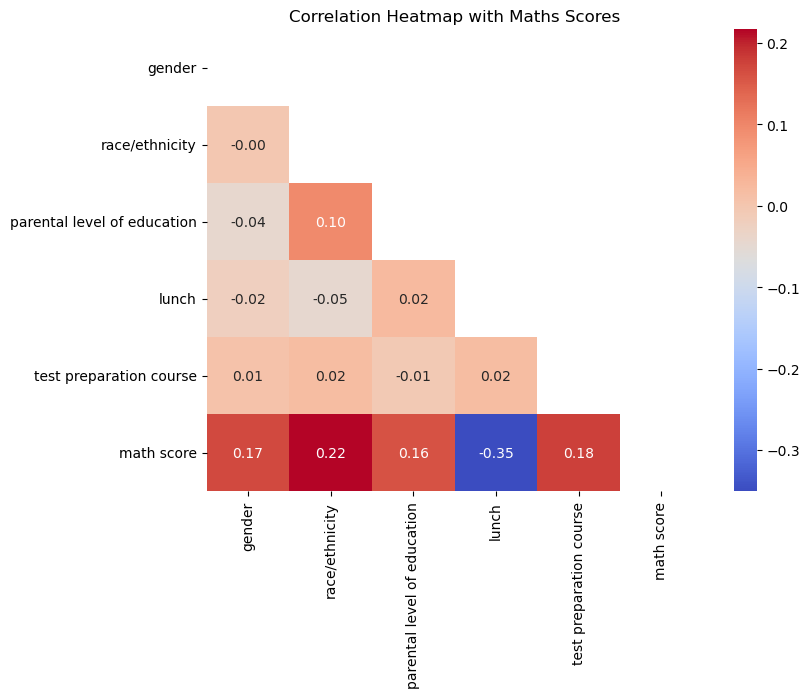

In [170]:
corr_5 = df_math_score_comparison.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_5, dtype=bool))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_5, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Maths Scores")
plt.show()

In [171]:
df_reading_score = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score']]
df_reading_score.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score
0,0,2,5,0,0,72
1,0,3,3,0,1,90
2,0,2,6,0,0,95
3,1,1,4,1,0,57
4,1,3,3,0,0,78


In [172]:
df_reading_score.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,-0.244313
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.145253
parental level of education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.190908
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.229560
test preparation course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.241780
reading score,-0.244313,0.145253,0.190908,-0.229560,0.241780,1.000000


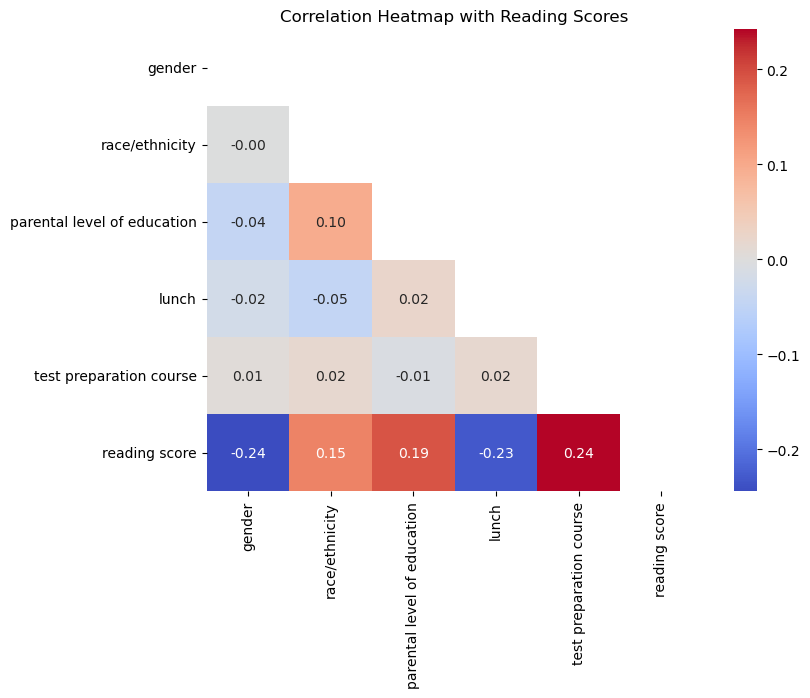

In [173]:
corr_1 = df_reading_score.corr()
mask = np.triu(np.ones_like(corr_1, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr_1, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Reading Scores")
plt.show()

In [174]:
df_writing_score = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'writing score']]
df_writing_score.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score
0,0,2,5,0,0,74
1,0,3,3,0,1,88
2,0,2,6,0,0,93
3,1,1,4,1,0,44
4,1,3,3,0,0,75


In [175]:
df_writing_score.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,-0.301225
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.165691
parental level of education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.236715
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.245769
test preparation course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.312946
writing score,-0.301225,0.165691,0.236715,-0.245769,0.312946,1.000000


Text(0.5, 1.0, 'Correlation Heatmap with Writing Scores')

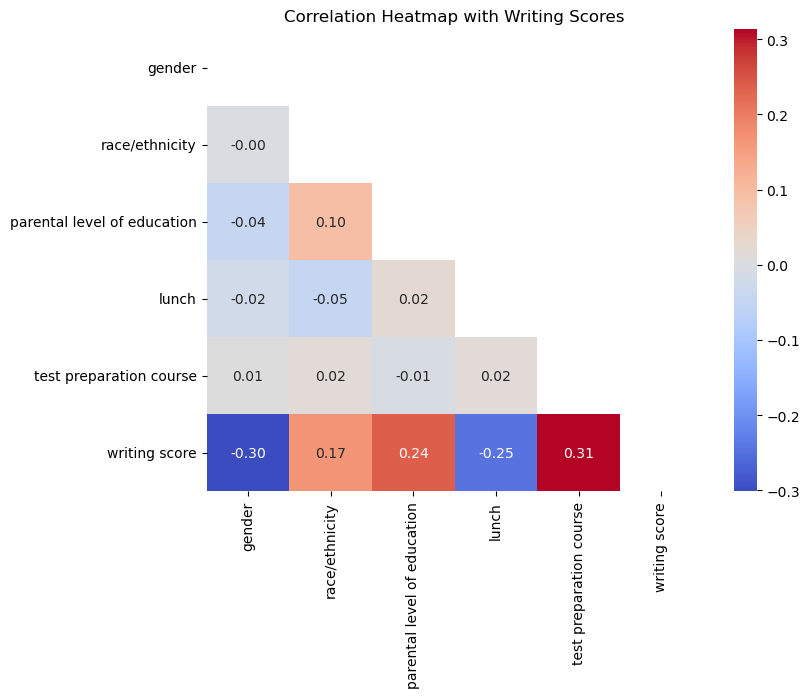

In [176]:
corr_3 = df_writing_score.corr()
mask = np.triu(np.ones_like(corr_3, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr_3, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Writing Scores")


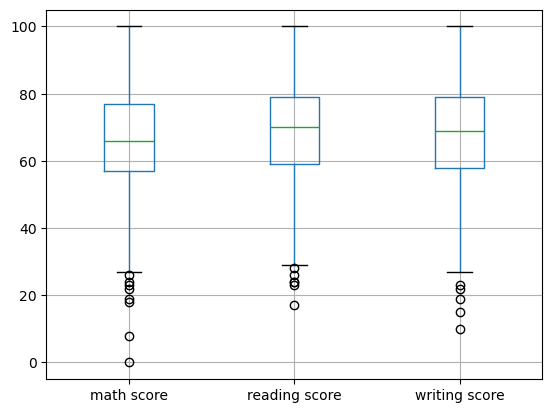

In [177]:
df_scores.boxplot()
plt.show()

In [178]:
df_scores.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [179]:
q_values_maths = df["math score"].quantile([0.33, 0.66])
print("Maths 33rd percentile:", q_values_maths.loc[0.33])
print("Maths 66th percentile:", q_values_maths.loc[0.66])
q_values_reading = df["reading score"].quantile([0.33, 0.66])
print("Reading 33rd percentile:", q_values_reading.loc[0.33])
print("Reading 66th percentile:", q_values_reading.loc[0.66])
q_values_writing = df["writing score"].quantile([0.33, 0.66])
print("Writing 33rd percentile:", q_values_writing.loc[0.33])
print("Writing 66th percentile:", q_values_writing.loc[0.66])


Maths 33rd percentile: 60.0
Maths 66th percentile: 73.0
Reading 33rd percentile: 63.0
Reading 66th percentile: 76.0
Writing 33rd percentile: 62.0
Writing 66th percentile: 75.0


In [180]:
df["math score"].value_counts().unique

<bound method Series.unique of math score
65    36
62    35
69    32
59    32
73    27
      ..
24     1
26     1
19     1
23     1
8      1
Name: count, Length: 81, dtype: int64>

In [181]:
conditions = [
    (df["writing score"] < 60),
    ((df["writing score"] >= 61) & (df["writing score"] <=75)),
    (df["writing score"] >75)
]

df["writing_score_banded"] = np.select(conditions, [0,1,2])

In [182]:
df["writing_score_banded"].value_counts()

writing_score_banded
1    371
2    328
0    301
Name: count, dtype: int64

In [183]:
conditions = [
    (df["reading score"] < 60),
    ((df["reading score"] >= 61) & (df["reading score"] <=75)),
    (df["reading score"] >75)
]

df["reading_score_banded"] = np.select(conditions, [0,1,2])

In [184]:
df["reading_score_banded"].value_counts()

reading_score_banded
1    381
2    344
0    275
Name: count, dtype: int64

In [185]:
conditions = [
    (df["math score"] < 60),
    ((df["math score"] >= 61) & (df["math score"] <=75)),
    (df["math score"] >75)
]

df["math_score_banded"] = np.select(conditions, [0,1,2])

In [186]:
df["math_score_banded"].value_counts()

math_score_banded
1    387
0    339
2    274
Name: count, dtype: int64

In [187]:
df.dtypes

gender                         int64
race/ethnicity                 int64
parental level of education    int64
lunch                          int64
test preparation course        int64
math score                     int64
reading score                  int64
writing score                  int64
writing_score_banded           int64
reading_score_banded           int64
math_score_banded              int64
dtype: object

In [188]:
df_reading_score_revised = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading_score_banded']]
df_reading_score_revised.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading_score_banded
0,0,2,5,0,0,1
1,0,3,3,0,1,2
2,0,2,6,0,0,2
3,1,1,4,1,0,0
4,1,3,3,0,0,2


In [189]:
df_reading_score_revised.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading_score_banded
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,-0.233031
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.119137
parental level of education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.148968
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.206638
test preparation course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.224357
reading_score_banded,-0.233031,0.119137,0.148968,-0.206638,0.224357,1.000000


In [190]:
df_reading_score_banded_revised = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading_score_banded']]
df_reading_score_banded_revised.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading_score_banded
0,0,2,5,0,0,1
1,0,3,3,0,1,2
2,0,2,6,0,0,2
3,1,1,4,1,0,0
4,1,3,3,0,0,2


Text(0.5, 1.0, 'Correlation Heatmap with Banded Reading Scores (<60, 61-75, 76+)')

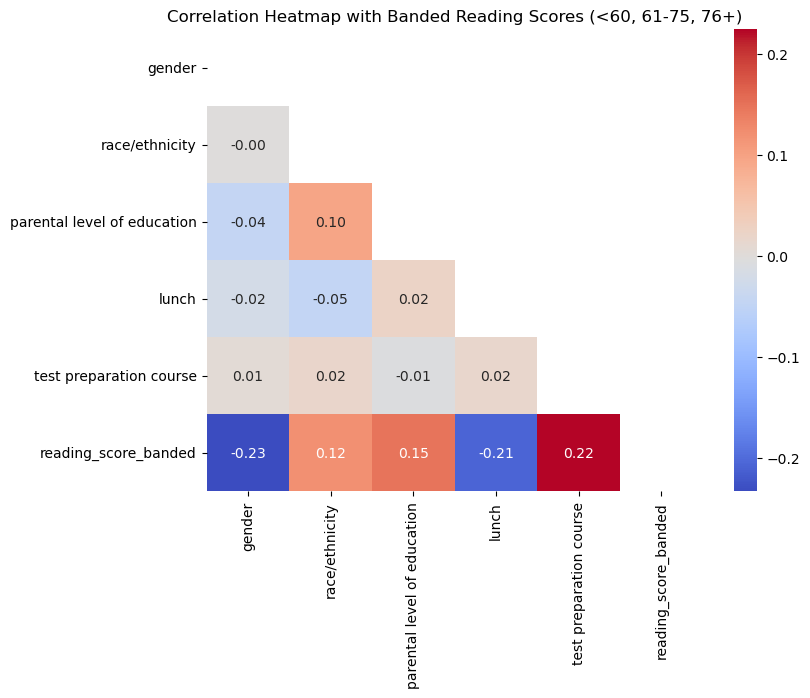

In [191]:
corr_2 = df_reading_score_banded_revised.corr()
mask = np.triu(np.ones_like(corr_2, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr_2, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Banded Reading Scores (<60, 61-75, 76+)")

In [192]:
df_math_score_banded_revised = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math_score_banded']]
df_math_score_banded_revised.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score_banded
0,0,2,5,0,0,1
1,0,3,3,0,1,1
2,0,2,6,0,0,2
3,1,1,4,1,0,0
4,1,3,3,0,0,2


In [193]:
df_math_score_banded_revised.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score_banded
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,0.152180
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.211995
parental level of education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.146873
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.294425
test preparation course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.150432
math_score_banded,0.152180,0.211995,0.146873,-0.294425,0.150432,1.000000


Text(0.5, 1.0, 'Correlation Heatmap with Banded Math Scores (<60, 61-75, 76+)')

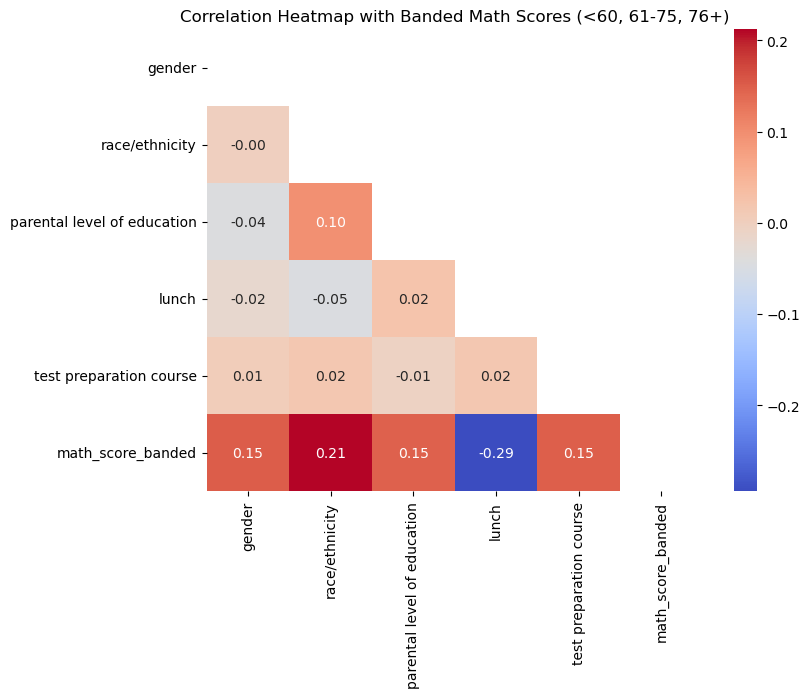

In [194]:
corr_6 = df_math_score_banded_revised.corr()
mask = np.triu(np.ones_like(corr_6, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr_6, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Banded Math Scores (<60, 61-75, 76+)")

In [195]:
df_writing_score_banded_revised = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'writing_score_banded']]
df_writing_score_banded_revised.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing_score_banded
0,0,2,5,0,0,1
1,0,3,3,0,1,2
2,0,2,6,0,0,2
3,1,1,4,1,0,0
4,1,3,3,0,0,1


In [196]:
df_writing_score_banded_revised.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing_score_banded
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,-0.295445
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.141042
parental level of education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.178760
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.228284
test preparation course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.303511
writing_score_banded,-0.295445,0.141042,0.178760,-0.228284,0.303511,1.000000


Text(0.5, 1.0, 'Correlation Heatmap with Banded Math Scores (<60, 61-75, 76+)')

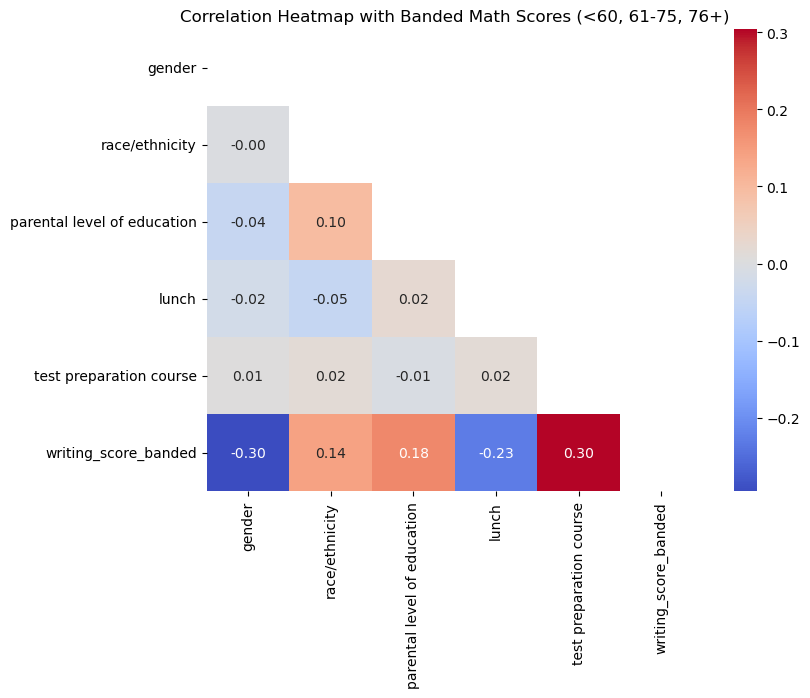

In [197]:
corr_4 = df_writing_score_banded_revised.corr()
mask = np.triu(np.ones_like(corr_4, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr_4, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Banded Math Scores (<60, 61-75, 76+)")

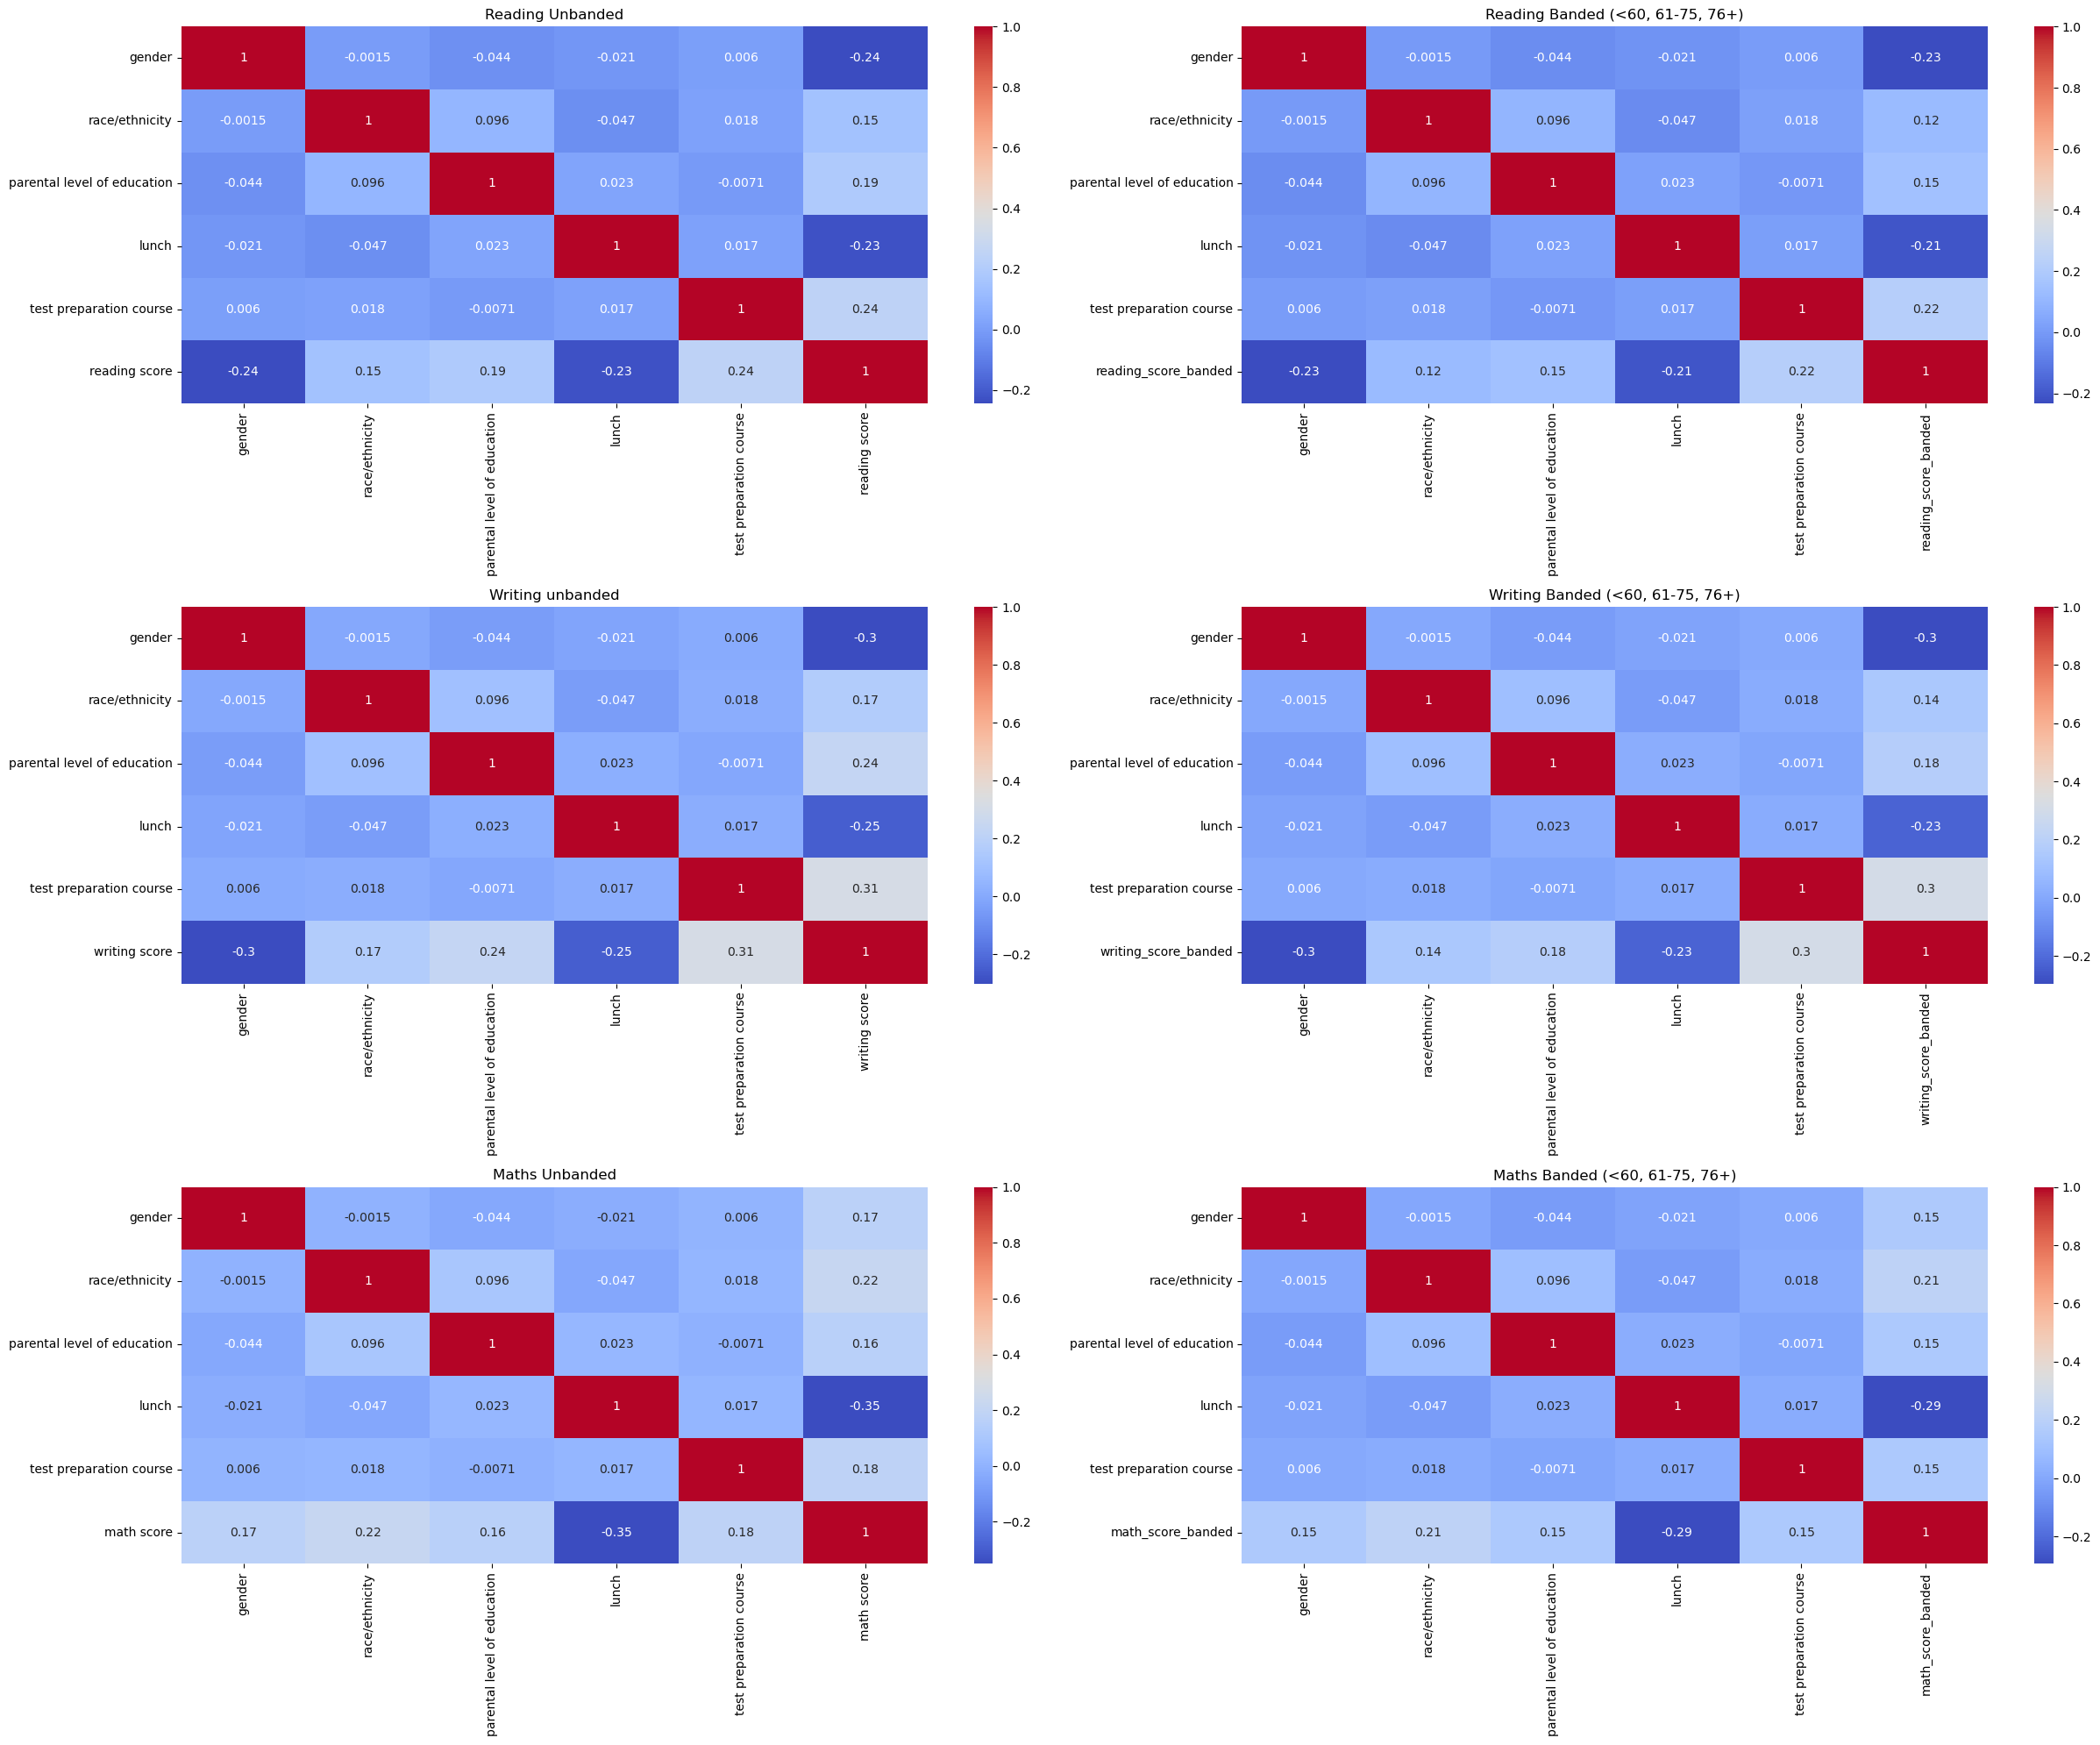

In [198]:

fig, axes = plt.subplots(3, 2, figsize=(25, 20))  
axes = axes.flatten()  # flatten for easy indexing

sns.heatmap(corr_1, annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Reading Unbanded")

sns.heatmap(corr_2, annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Reading Banded (<60, 61-75, 76+)")

sns.heatmap(corr_3, annot=True, cmap="coolwarm", ax=axes[2])
axes[2].set_title("Writing unbanded")

sns.heatmap(corr_4, annot=True, cmap="coolwarm", ax=axes[3])
axes[3].set_title("Writing Banded (<60, 61-75, 76+)")

sns.heatmap(corr_5, annot=True, cmap="coolwarm", ax=axes[4])
axes[4].set_title("Maths Unbanded")

sns.heatmap(corr_6, annot=True, cmap="coolwarm", ax=axes[5])
axes[5].set_title("Maths Banded (<60, 61-75, 76+)")

plt.tight_layout()
plt.show()






In [199]:
#Baseline Random Forest

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [201]:
#Banded Math Score Prediction
conditions = [
    (df["math score"] < 60),
    ((df["math score"] >= 61) & (df["math score"] <=75)),
    (df["math score"] >75)
]

df["math_score_banded"] = np.select(conditions, [0,1,2])

# Drop both raw math score and banded target from features
X = df.drop(["math_score_banded", "math score"], axis=1)

# Target is the banded math score
y = df["math_score_banded"]




In [202]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [203]:
y_train.shape[0]

800

In [204]:
X_test.shape[0]

200

In [205]:
y_train

271    0
584    1
931    1
543    2
562    2
      ..
481    0
705    1
730    1
587    0
237    1
Name: math_score_banded, Length: 800, dtype: int64

In [206]:
y_test

498    1
603    0
277    0
48     0
672    1
      ..
965    1
363    0
804    1
118    0
468    2
Name: math_score_banded, Length: 200, dtype: int64

In [207]:
y_test.mean()

np.float64(0.935)

In [208]:
y_train.mean()

np.float64(0.935)

In [209]:
y_train.value_counts(normalize=True)*100
# 

math_score_banded
1    38.750
0    33.875
2    27.375
Name: proportion, dtype: float64

In [210]:
y_test.value_counts(normalize=True)*100

math_score_banded
1    38.5
0    34.0
2    27.5
Name: proportion, dtype: float64

In [211]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'writing_score_banded', 'reading_score_banded',
       'math_score_banded'],
      dtype='object')


In [212]:
# Baseline random Forest
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [213]:
# Train baseline Random Forest
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

# Predictions
y_pred = rf_baseline.predict(X_test)

# Performance
accuracy = accuracy_score(y_test, y_pred)

In [214]:
accuracy * 100


76.5

In [215]:
print(classification_report(y_test, y_pred, target_names=["<60 score", "61-75 score", "76 and above score"]))

                    precision    recall  f1-score   support

         <60 score       0.84      0.84      0.84        68
       61-75 score       0.69      0.70      0.70        77
76 and above score       0.78      0.76      0.77        55

          accuracy                           0.77       200
         macro avg       0.77      0.77      0.77       200
      weighted avg       0.77      0.77      0.77       200



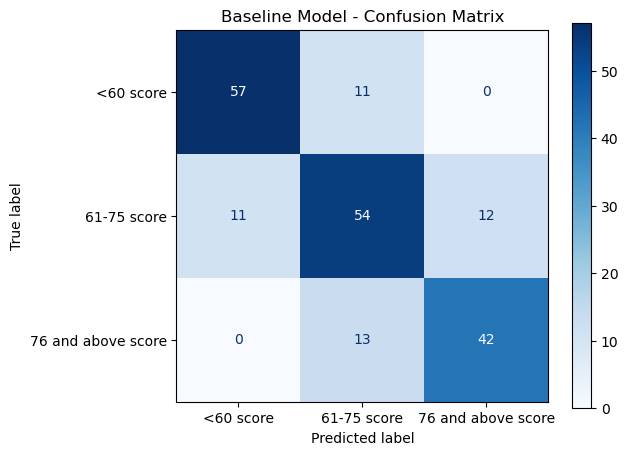

In [216]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<60 score", "61-75 score", "76 and above score"])
disp.plot(ax=ax, cmap='Blues')
plt.title('Baseline Model - Confusion Matrix')
plt.show()

In [217]:
# Feature Importance and Selection
rf_baseline.feature_importances_

array([0.11698662, 0.07458951, 0.07990984, 0.03473698, 0.03100222,
       0.25589419, 0.25034358, 0.08211503, 0.07442203])

In [218]:
X.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score',
       'writing_score_banded', 'reading_score_banded'],
      dtype='object')

In [219]:
# Get and format feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_baseline.feature_importances_
})

# Round and sort by importance
feature_importance = feature_importance.round(3).sort_values(by='importance', ascending=False)

# Display the result
feature_importance


,feature,importance
5,reading score,0.256
6,writing score,0.250
0,gender,0.117
7,writing_score_banded,0.082
2,parental level of education,0.080
1,race/ethnicity,0.075
8,reading_score_banded,0.074
3,lunch,0.035
4,test preparation course,0.031


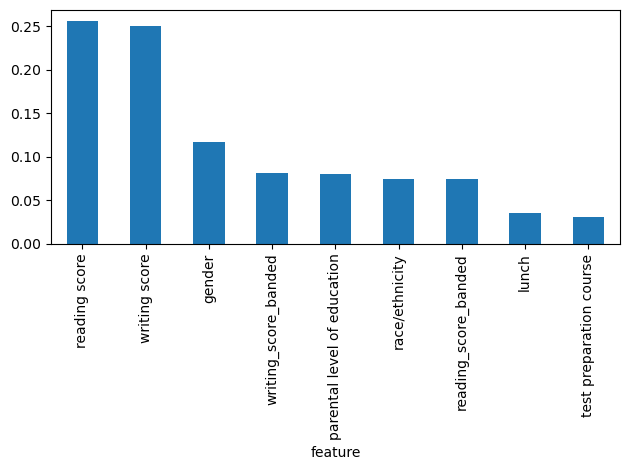

In [220]:
# plot feature importance
feature_importance.sort_values(by='importance', ascending=False).plot.bar(x='feature', y='importance', legend=False) 
plt.tight_layout()
plt.show()   

In [221]:
X.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score',
       'writing_score_banded', 'reading_score_banded'],
      dtype='object')

In [222]:
# Select all 9 features and convert to list
selected_features_all = feature_importance[
    feature_importance['feature'].isin([
        'gender',
        'race/ethnicity',
        'parental level of education',
        'lunch',
        'test preparation course',
        'reading score',
        'writing score',
        'writing_score_banded', 
        'reading_score_banded'
    ])
]['feature'].tolist()

selected_features_all

['reading score',
 'writing score',
 'gender',
 'writing_score_banded',
 'parental level of education',
 'race/ethnicity',
 'reading_score_banded',
 'lunch',
 'test preparation course']

In [223]:
# Train model with selected features
X_train_all = X_train[selected_features_all]
X_test_all = X_test[selected_features_all]

rf_all = RandomForestClassifier(random_state=42)
rf_all.fit(X_train_all, y_train)

y_pred_all = rf_all.predict(X_test_all)
accuracy_all = accuracy_score(y_test, y_pred_all)
print("Accuracy with all 9 features:", accuracy_all)

Accuracy with all 9 features: 0.755


In [224]:
# Select 7 specific features with scores continuous not banded and convert to list
selected_features_seven = feature_importance[
    feature_importance['feature'].isin([
        'gender',
        'race/ethnicity',
        'parental level of education',
        'lunch',
        'test preparation course',
        'reading score',
        'writing score'
    ])
]['feature'].tolist()

selected_features_seven


['reading score',
 'writing score',
 'gender',
 'parental level of education',
 'race/ethnicity',
 'lunch',
 'test preparation course']

In [225]:
X_train_seven = X_train[selected_features_seven]
X_test_seven = X_test[selected_features_seven]

rf_seven = RandomForestClassifier(random_state=42)
rf_seven.fit(X_train_seven, y_train)

y_pred_seven = rf_seven.predict(X_test_seven)
accuracy_seven = accuracy_score(y_test, y_pred_seven)
print("Accuracy with 7 features:", accuracy_seven)

Accuracy with 7 features: 0.73


In [226]:
# including 7 featrues with banded levels but not continuous scores
selected_features_seven_banded = feature_importance[
    feature_importance['feature'].isin([
        'gender',
        'race/ethnicity',
        'parental level of education',
        'lunch',
        'test preparation course',
        'writing_score_banded', 
        'reading_score_banded'
            ])
]['feature'].tolist()

selected_features_seven_banded

['gender',
 'writing_score_banded',
 'parental level of education',
 'race/ethnicity',
 'reading_score_banded',
 'lunch',
 'test preparation course']

In [227]:
# Train model with selected features
X_train_banded = X_train[selected_features_seven_banded]
X_test_banded = X_test[selected_features_seven_banded]

rf_banded = RandomForestClassifier(random_state=42)
rf_banded.fit(X_train_banded, y_train)

y_pred_banded = rf_banded.predict(X_test_banded)
accuracy_banded = accuracy_score(y_test, y_pred_banded)

print("Accuracy with 7 banded features:", accuracy_banded)

Accuracy with 7 banded features: 0.655


In [228]:
#Top 2 features only
top_n = 2
selected_features_top_two = feature_importance.head(top_n)['feature'].tolist()

selected_features_top_two

['reading score', 'writing score']

In [229]:
# --- Train model with top two features ---
X_train_top2 = X_train[selected_features_top_two]
X_test_top2 = X_test[selected_features_top_two]

rf_top2 = RandomForestClassifier(random_state=42)
rf_top2.fit(X_train_top2, y_train)

y_pred_top2 = rf_top2.predict(X_test_top2)
accuracy_top2 = accuracy_score(y_test, y_pred_top2)

print("Accuracy with top two features:", accuracy_top2)

Accuracy with top two features: 0.585


In [230]:
# including 3 featrues 
selected_features_three = feature_importance[
    feature_importance['feature'].isin([
        'gender',
        'reading score',
        'writing score'
            ])
]['feature'].tolist()

selected_features_three

['reading score', 'writing score', 'gender']

In [231]:
# Train model with selected features
# --- Train model with these features ---
X_train_three = X_train[selected_features_three]
X_test_three = X_test[selected_features_three]

rf_three = RandomForestClassifier(random_state=42)
rf_three.fit(X_train_three, y_train)

y_pred_three = rf_three.predict(X_test_three)
accuracy_three = accuracy_score(y_test, y_pred_three)

print("Accuracy with 3 features:", accuracy_three)

Accuracy with 3 features: 0.745


In [232]:
# --- Select top 1 feature by importance ---
top_n = 1
selected_features_top_one = feature_importance.head(top_n)['feature'].tolist()

print("Top feature selected:", selected_features_top_one)

# --- Train model with this single feature ---
X_train_one = X_train[selected_features_top_one]
X_test_one = X_test[selected_features_top_one]

rf_one = RandomForestClassifier(random_state=42)
rf_one.fit(X_train_one, y_train)

y_pred_one = rf_one.predict(X_test_one)
accuracy_one = accuracy_score(y_test, y_pred_one)

print("Accuracy with top one feature:", accuracy_one)


Top feature selected: ['reading score']
Accuracy with top one feature: 0.625


In [233]:
# Train model with selected bottom 2 features
selected_features_bottom = feature_importance[
    feature_importance['feature'].isin([
        'test preparation course',
        'lunch'
    ])
]['feature'].tolist()

print("Bottom features selected:", selected_features_bottom)

# --- Train/test split with bottom features ---
X_train_selected_bottom = X_train[selected_features_bottom]
X_test_selected_bottom = X_test[selected_features_bottom]

# --- Train Random Forest ---
rf_selected_bottom = RandomForestClassifier(random_state=42)
rf_selected_bottom.fit(X_train_selected_bottom, y_train)

# --- Predict and evaluate ---
y_pred_selected_bottom = rf_selected_bottom.predict(X_test_selected_bottom)
accuracy_selected_bottom = accuracy_score(y_test, y_pred_selected_bottom)

print("Accuracy with bottom features:", accuracy_selected_bottom)

Bottom features selected: ['lunch', 'test preparation course']
Accuracy with bottom features: 0.41


In [234]:
Case 1: How well can we predict any exam based on demographic features alone?
selected_features_demographic = feature_importance[
    feature_importance['feature'].isin([
        'gender',
        'race/ethnicity',
        'parental level of education',
        'lunch',
        'test preparation course'
                    ])
]['feature'].tolist()

print("Demographic features selected:", selected_features_demographic)

# --- Train/test split with demographic features ---
X_train_selected_demographic = X_train[selected_features_demographic]
X_test_selected_demographic = X_test[selected_features_demographic]

# --- Train Random Forest ---
rf_selected_demographic = RandomForestClassifier(random_state=42)
rf_selected_demographic.fit(X_train_selected_demographic, y_train)

# --- Predict and evaluate ---
y_pred_selected_demographic = rf_selected_demographic.predict(X_test_selected_demographic)
accuracy_selected_demographic = accuracy_score(y_test, y_pred_selected_demographic)

print("Accuracy with demographic features:", accuracy_selected_demographic)

Object `alone` not found.
Demographic features selected: ['gender', 'parental level of education', 'race/ethnicity', 'lunch', 'test preparation course']
Accuracy with demographic features: 0.36


In [235]:
y_train.head()

271    0
584    1
931    1
543    2
562    2
Name: math_score_banded, dtype: int64

In [236]:
# --- Banded Reading Score Prediction ---
conditions = [
    (df["reading score"] < 60),
    ((df["reading score"] >= 61) & (df["reading score"] <= 75)),
    (df["reading score"] > 75)
]
df["reading_score_banded"] = np.select(conditions, [0, 1, 2])

# Features and target
X2 = df.drop(["reading_score_banded", "reading score"], axis=1)
y2 = df["reading_score_banded"]

# Train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Select demographic features
selected_features_demographic = [
    'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'
]

# Train/test split with demographic features
X2_train_selected = X2_train[selected_features_demographic]
X2_test_selected = X2_test[selected_features_demographic]

# Train Random Forest
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X2_train_selected, y2_train)

# Predict and evaluate
y2_pred = rf2.predict(X2_test_selected)
accuracy2 = accuracy_score(y2_test, y2_pred)

print("Accuracy with demographic features (reading):", accuracy2)



Accuracy with demographic features (reading): 0.4


In [237]:
# Now for predicint writing score based on 5 demographic characteristics
# --- Banded Writing Score Prediction ---
conditions = [
    (df["writing score"] < 60),
    ((df["writing score"] >= 61) & (df["writing score"] <= 75)),
    (df["writing score"] > 75)
]
df["writing_score_banded"] = np.select(conditions, [0, 1, 2])

# Features and target
X3 = df.drop(["writing_score_banded", "writing score"], axis=1)
y3 = df["writing_score_banded"]

# Train/test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Select demographic features
selected_features_demographic = [
    'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'
]

# Train/test split with demographic features
X3_train_selected = X3_train[selected_features_demographic]
X3_test_selected = X3_test[selected_features_demographic]

# Train Random Forest
rf3 = RandomForestClassifier(random_state=42)
rf3.fit(X3_train_selected, y3_train)

# Predict and evaluate
y3_pred = rf3.predict(X3_test_selected)
accuracy3 = accuracy_score(y3_test, y3_pred)

print("Accuracy with demographic features (writing):", accuracy3)


Accuracy with demographic features (writing): 0.425


In [238]:
# Now how predicting writing scores using demographics and reading score
# Features and target
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- Features and target ---
X4 = df.drop(["writing_score_banded", "writing score"], axis=1)
y4 = df["writing score"]

# --- Train/test split ---
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# --- Select demographic features (plus reading score if you want to test cross-predictive power) ---
selected_features_demographic = [
    'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score'
]

X4_train_selected = X4_train[selected_features_demographic]
X4_test_selected = X4_test[selected_features_demographic]

# --- Train Random Forest Regressor ---
rf4 = RandomForestRegressor(random_state=42)
rf4.fit(X4_train_selected, y4_train)

# --- Predict ---
y4_pred = rf4.predict(X4_test_selected)

# --- Evaluate with regression metrics ---
r2 = r2_score(y4_test, y4_pred)
mae = mean_absolute_error(y4_test, y4_pred)
rmse = np.sqrt(mean_squared_error(y4_test, y4_pred))

print("R² score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)



R² score: 0.8969871390563943
Mean Absolute Error: 3.912273511904762
Root Mean Squared Error: 4.9827550743262


In [239]:
# Now predicting writing scores using demographics only
# Features and target
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- Features and target ---
X5 = df.drop(["writing_score_banded", "writing score"], axis=1)
y5 = df["writing score"]

# --- Train/test split ---
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

# --- Select demographic features (plus reading score if you want to test cross-predictive power) ---
selected_features_demographic = [
    'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course' 
]

X5_train_selected = X5_train[selected_features_demographic]
X5_test_selected = X5_test[selected_features_demographic]

# --- Train Random Forest Regressor ---
rf5 = RandomForestRegressor(random_state=42)
rf5.fit(X5_train_selected, y5_train)

# --- Predict ---
y5_pred = rf5.predict(X5_test_selected)

# --- Evaluate with regression metrics ---
r2 = r2_score(y5_test, y5_pred)
mae = mean_absolute_error(y5_test, y5_pred)
rmse = np.sqrt(mean_squared_error(y5_test, y5_pred))

print("R² score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)



R² score: 0.10172087673369534
Mean Absolute Error: 11.205181994694376
Root Mean Squared Error: 14.713956537767022


In [240]:
# Now predicting writing scores using demographics and maths score
# Features and target
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# --- Features and target ---
X6 = df.drop(["writing_score_banded", "writing score"], axis=1)
y6 = df["writing score"]

# --- Train/test split ---
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

# --- Select demographic features + math score ---
selected_features_demographic = [
    'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score'
]

X6_train_selected = X6_train[selected_features_demographic]
X6_test_selected = X6_test[selected_features_demographic]

# --- Train Random Forest Regressor ---
rf6 = RandomForestRegressor(random_state=42)
rf6.fit(X6_train_selected, y6_train)

# --- Predict ---
y6_pred = rf6.predict(X6_test_selected)

# --- Evaluate with regression metrics ---
r2 = r2_score(y6_test, y6_pred)
mae = mean_absolute_error(y6_test, y6_pred)
rmse = np.sqrt(mean_squared_error(y6_test, y6_pred))

print("R² score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


R² score: 0.8465262365028363
Mean Absolute Error: 4.96230869047619
Root Mean Squared Error: 6.081922575958346


In [241]:
# Now predicting writing scores using demographics only
# Features and target
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- Features and target ---
X7 = df.drop(["writing_score_banded", "writing score"], axis=1)
y7 = df["writing score"]

# --- Train/test split ---
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)

# --- Select demographic features (plus reading score if you want to test cross-predictive power) ---
selected_features_demographic = [
    'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'
]

X7_train_selected = X7_train[selected_features_demographic]
X7_test_selected = X7_test[selected_features_demographic]

# --- Train Random Forest Regressor ---
rf7 = RandomForestRegressor(random_state=42)
rf7.fit(X7_train_selected, y7_train)

# --- Predict ---
y7_pred = rf7.predict(X7_test_selected)

# --- Evaluate with regression metrics ---
r2 = r2_score(y7_test, y7_pred)
mae = mean_absolute_error(y7_test, y7_pred)
rmse = np.sqrt(mean_squared_error(y7_test, y7_pred))

print("R² score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

R² score: 0.10172087673369534
Mean Absolute Error: 11.205181994694376
Root Mean Squared Error: 14.713956537767022


In [242]:
# Part 6: Hyperparamter Tuning of best models


In [243]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 'Writing', 'Reading', 'Math'
df = pd.read_csv("StudentsPerformance.csv")
X = df[['writing score', 'reading score', 'math score']]

# 1. Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA
pca = PCA(n_components=2)  # reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# 3. Check explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 4. Add PCA results back to dataframe
df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]


Explained variance ratio: [0.90614325 0.07886171]


In [244]:
import pandas as pd

# Save to Excel
df.to_excel("exam_scores_pca.xlsx", index=False)


In [245]:
# Tests to determine whether features are normally distributed
df.columns.tolist()


['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'PC1',
 'PC2']

In [257]:

from scipy.stats import ttest_ind

g1 = df[df["gender"]=="male"]["PC1"]
g2 = df[df["gender"]=="female"]["PC1"]

ttest_ind(g1, g2)




TtestResult(statistic=np.float64(-4.404783692671413), pvalue=np.float64(1.1732426134360317e-05), df=np.float64(998.0))

In [258]:
df.groupby("gender")["PC1"].mean()

gender
female    0.219632
male     -0.236036
Name: PC1, dtype: float64

In [259]:
from scipy.stats import ttest_ind

g1 = df[df["lunch"]=="standard"]["PC1"]
g2 = df[df["lunch"]=="free/reduced"]["PC1"]

ttest_ind(g1, g2)

TtestResult(statistic=np.float64(9.488201216859338), pvalue=np.float64(1.666724228761571e-20), df=np.float64(998.0))

In [260]:
df.groupby("lunch")["PC1"].mean()

lunch
free/reduced   -0.639277
standard        0.351850
Name: PC1, dtype: float64

In [262]:
from scipy.stats import ttest_ind

g1 = df[df["test preparation course"]=="none"]["PC1"]
g2 = df[df["test preparation course"]=="completed"]["PC1"]

ttest_ind(g1, g2)

TtestResult(statistic=np.float64(-8.424414186665814), pvalue=np.float64(1.2516903306564199e-16), df=np.float64(998.0))

In [267]:
df.groupby("test preparation course")["PC1"].mean()

test preparation course
completed    0.568908
none        -0.317241
Name: PC1, dtype: float64

In [268]:
Ethnicity ANOVA: F = 8.935996780604365 , p = 4.322854843676777e-07
Parental Ed ANOVA: F = 10.797203706454672 , p = 3.9685611756701304e-10

SyntaxError: invalid syntax (1576808137.py, line 1)

In [ ]:
from scipy.stats import f_oneway

# Ethnicity
ethnicity_groups = [df[df["race/ethnicity"]==g]["PC1"] for g in df["race/ethnicity"].unique()]
f_eth, p_eth = f_oneway(*ethnicity_groups)
print("Ethnicity ANOVA: F =", f_eth, ", p =", p_eth)

# Parental education
parent_groups = [df[df["parental level of education"]==g]["PC1"] for g in df["parental level of education"].unique()]
f_parent, p_parent = f_oneway(*parent_groups)
print("Parental Ed ANOVA: F =", f_parent, ", p =", p_parent)

Ethnicity ANOVA: F = 8.935996780604365 , p = 4.322854843676777e-07
Parental Ed ANOVA: F = 10.797203706454672 , p = 3.9685611756701304e-10


In [ ]:
Ethnicity ANOVA: F = 8.935996780604365 , p = 4.322854843676777e-07
Parental Ed ANOVA: F = 10.797203706454672 , p = 3.9685611756701304e-10

In [ ]:
df.groupby("race/ethnicity")["PC1"].mean()


race/ethnicity
group A   -0.552780
group B   -0.264729
group C   -0.070878
group D    0.162228
group E    0.568586
Name: PC1, dtype: float64

In [ ]:
df.groupby("parental level of education")["PC1"].mean()

parental level of education
associate's degree    0.207941
bachelor's degree     0.481498
high school          -0.541656
master's degree       0.679173
some college          0.080206
some high school     -0.307333
Name: PC1, dtype: float64